In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

In [65]:
df = pd.read_csv('diamonds.csv')
df.drop(df.columns[[0]], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [66]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


((53940, 10), None)

In [67]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [68]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [69]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [70]:
for col in df.columns:
    print(f'Количество уникальных значений в поле {col}: {df[col].nunique()}')
    print('Уникальные значения:')
    print(df[col].value_counts(), '\n')

Количество уникальных значений в поле carat: 273
Уникальные значения:
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64 

Количество уникальных значений в поле cut: 5
Уникальные значения:
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

Количество уникальных значений в поле color: 7
Уникальные значения:
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

Количество уникальных значений в поле clarity: 8
Уникальные значения:
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 

Количество уникальных значений в поле depth: 184
Уникальные значения:
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
72.9       1
52.7       1


Text(0.5, 1.0, 'Корреляция количественных признаков')

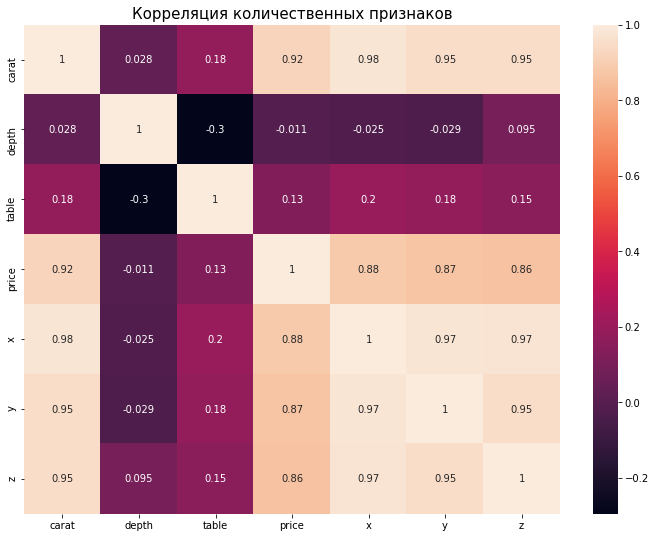

In [71]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), annot = True)
plt.title('Корреляция количественных признаков', fontsize = 15)

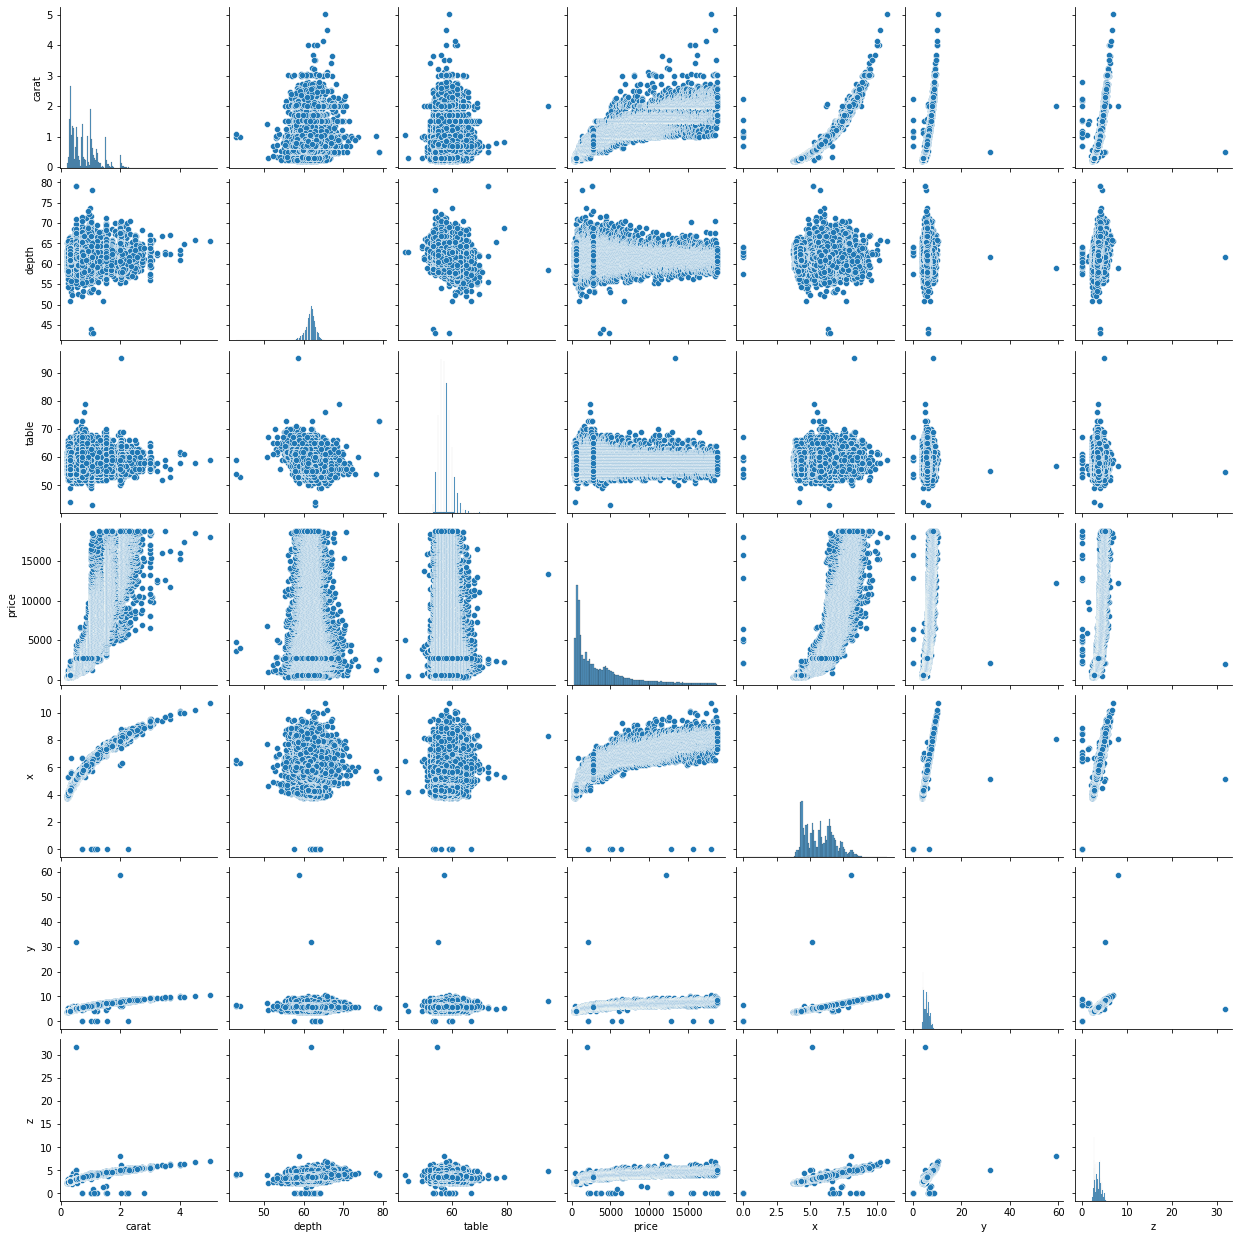

In [9]:
sns.pairplot(df, kind = "scatter")#, plot_kws = dict(s=100, edgecolor="white", linewidth = 2.5))

In [72]:
df_new = df.drop(['x', 'y', 'z'], axis = True)

In [73]:
def cat_num(data):
    cat = [col for col in data.columns if data[col].dtype == 'object'] 
    num = [col for col in data.columns if data[col].dtype != 'object'] 
    return cat, num

In [74]:
categorical_cols, numerical_cols = cat_num(df)
cat_cols, num_cols = cat_num(df_new)

In [75]:
def count_val(data, cols):
    for col in cols:
        if data[col].nunique() > 20:
            fig, ax = plt.subplots(figsize=(20, 10))
        sns.countplot(data = data, x = col)
        plt.xticks(rotation=90)
        plt.title(f'Количество данных в разрезе признака {col}')
        plt.grid
        plt.show()

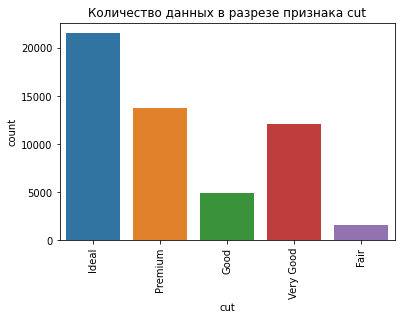

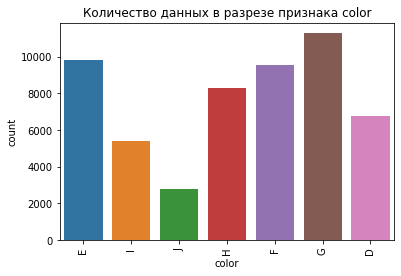

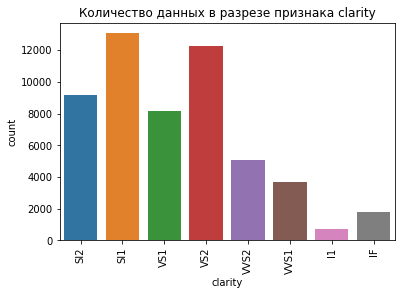

In [76]:
count_val(df, categorical_cols)

labelenc = LabelEncoder()
for col in categorical_cols:
    #if df[col].nunique() <= 5:
    col_encoder = pd.Series(labelenc.fit_transform(df[col]))
    df[col] = col_encoder

    col_encoder = pd.Series(labelenc.fit_transform(df_new[col]))
    df_new[col] = col_encoder
        
df.head()

In [77]:
ohe = OneHotEncoder(sparse=False)
for col in categorical_cols:
    #if df_new[col].nunique() > 5:
    col_encoder = pd.DataFrame(ohe.fit_transform(df[col].values.reshape(-1, 1)),
                               columns = [col + str(i+1) for i in range(df[col].nunique())])
    df = pd.concat([col_encoder, df], axis = 1)
    df.drop(col, axis = 1, inplace = True)

    col_encoder = pd.DataFrame(ohe.fit_transform(df_new[col].values.reshape(-1, 1)),
                               columns = [col + str(i+1) for i in range(df_new[col].nunique())])
    df_new = pd.concat([col_encoder, df_new], axis = 1)
    df_new.drop(col, axis = 1, inplace = True)
df_new.head()

,clarity1,clarity2,clarity3,clarity4,clarity5,clarity6,clarity7,clarity8,color1,color2,color3,color4,color5,color6,color7,cut1,cut2,cut3,cut4,cut5,carat,depth,table,price
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.23,61.5,55.0,326
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21,59.8,61.0,326
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.23,56.9,65.0,327
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.29,62.4,58.0,334
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.31,63.3,58.0,335


In [78]:
df.head()

,clarity1,clarity2,clarity3,clarity4,clarity5,clarity6,clarity7,clarity8,color1,color2,color3,color4,color5,color6,color7,cut1,cut2,cut3,cut4,cut5,carat,depth,table,price,x,y,z
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.31,63.3,58.0,335,4.34,4.35,2.75


In [79]:
df_new.dtypes

clarity1    float64
clarity2    float64
clarity3    float64
clarity4    float64
clarity5    float64
clarity6    float64
clarity7    float64
clarity8    float64
color1      float64
color2      float64
color3      float64
color4      float64
color5      float64
color6      float64
color7      float64
cut1        float64
cut2        float64
cut3        float64
cut4        float64
cut5        float64
carat       float64
depth       float64
table       float64
price         int64
dtype: object

# нужно ли потом проверять корреляцию с преобразованными количественными признакми?

In [80]:
scaler = StandardScaler()#(feature_range = (-1, 1))
for col in numerical_cols:
    if col != 'price':
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))  
    
# for col in num_cols:
#     if col != 'price':
#         df_new[col] = scaler.fit_transform(df_new[col].values.reshape(-1, 1))      
    
df_new.head()

,clarity1,clarity2,clarity3,clarity4,clarity5,clarity6,clarity7,clarity8,color1,color2,color3,color4,color5,color6,color7,cut1,cut2,cut3,cut4,cut5,carat,depth,table,price
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.23,61.5,55.0,326
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.21,59.8,61.0,326
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.23,56.9,65.0,327
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.29,62.4,58.0,334
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.31,63.3,58.0,335


In [81]:
df.head()

,clarity1,clarity2,clarity3,clarity4,clarity5,clarity6,clarity7,clarity8,color1,color2,color3,color4,color5,color6,color7,cut1,cut2,cut3,cut4,cut5,carat,depth,table,price,x,y,z
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.198168,-0.174092,-1.099672,326,-1.587837,-1.536196,-1.571129
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.240361,-1.360738,1.585529,326,-1.641325,-1.658774,-1.741175
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.198168,-3.385019,3.375663,327,-1.498691,-1.457395,-1.741175
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.071587,0.454133,0.242928,334,-1.364971,-1.317305,-1.287720
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.029394,1.082358,0.242928,335,-1.240167,-1.212238,-1.117674


# Построение ИНН

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, random_split

In [83]:
class Diamond(Dataset):
    def __init__(self, data):
        self.X = torch.tensor(data.drop('price', axis = 1).values, dtype = torch.float64)
        self.y = torch.tensor(data[['price']].values, dtype = torch.float64)

    def __len__(self): # длина данных
        return len(self.y)

    def __getitem__(self, idx): # пара: пример - ответ
        return self.X[idx], self.y[idx]

In [92]:
class DiamModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        # слои:
        self.bn1 = nn.BatchNorm1d(input_size)
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, int(hidden_size/4))
        self.fc3 = nn.Linear(int(hidden_size/4), 1)
        # функции активации:
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
    
    def forward(self, X):
        out = self.relu(self.fc1(self.bn1(X)))
        out = self.relu(self.fc2(self.bn2(out)))
        out = self.fc3(out)
        return out

In [93]:
dataset = Diamond(df_new) 

test_split = 0.2
random_seed= 42
shuffle_dataset = True

# Разделяем на тестовый и обучаемый
dataset_size = len(dataset) # длина датасета
ind = list(range(dataset_size)) # индксы датасета
split = int(np.floor(test_split * dataset_size)) # размер тренировочного датасета
"""shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(ind)

train_indices, test_indices = ind[split:], ind[:split]

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)"""
train_size = dataset_size - split

train_dataset, test_dataset = random_split(dataset, [train_size, split])

dataset_train = DataLoader(train_dataset, batch_size = 256) #, sampler = train_sampler)
dataset_test = DataLoader(test_dataset, batch_size = len(test_dataset)) #, sampler = test_sampler)     

In [97]:
num_epochs = int(input('Введите количество эпох: ')) + 1
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = dataset.X.shape[1] # количество фичей
hidden_size = 256 # кол-во нейронов в первом слое

model = DiamModel(input_size, hidden_size).to(device)
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_history_train = list()
loss_history_test = list()

for epoch in range(1, num_epochs):
    batch_loss = 0
    for X_tr, y_tr in dataset_train:
        #optimizer.zero_grad()
    
        X_tr, y_tr = X_tr.to(device), y_tr.to(device)
    
        out = model(X_tr.float()).to(device)
        
        cur_loss = loss(out, y_tr.float())
        batch_loss += cur_loss
        
        cur_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    loss_history_train.append(batch_loss/len(dataset_train))
    
    with torch.no_grad(): #можно так делать?
        for X_test, y_test in dataset_test:
            y_pred = model(X_test.float().to(device))
            batch_loss_test = loss(y_pred, y_test)
            loss_history_test.append(batch_loss_test)
    
    if epoch % 10 == 0:
      print(f'epoch: [{epoch}/{num_epochs-1}]: loss_train = {batch_loss/len(dataset_train)}; loss_test = {batch_loss_test}')

Введите количество эпох: 500
epoch: [10/500]: loss_train = 525276.375; loss_test = 398987.08338520647
epoch: [20/500]: loss_train = 461427.59375; loss_test = 348397.1790007541
epoch: [30/500]: loss_train = 446362.28125; loss_test = 340551.1140372779
epoch: [40/500]: loss_train = 434706.6875; loss_test = 334362.9590946186
epoch: [50/500]: loss_train = 424480.09375; loss_test = 329288.44615160214
epoch: [60/500]: loss_train = 415469.6875; loss_test = 323963.33376398514
epoch: [70/500]: loss_train = 407308.6875; loss_test = 319943.4727653227
epoch: [80/500]: loss_train = 399890.78125; loss_test = 315591.99094417144
epoch: [90/500]: loss_train = 393936.3125; loss_test = 314859.45661750337
epoch: [100/500]: loss_train = 388872.875; loss_test = 314627.515351014
epoch: [110/500]: loss_train = 384147.15625; loss_test = 313536.4007194639
epoch: [120/500]: loss_train = 379929.3125; loss_test = 315089.08588062105
epoch: [130/500]: loss_train = 375726.875; loss_test = 312968.5258925717
epoch: [140

KeyboardInterrupt: ignored

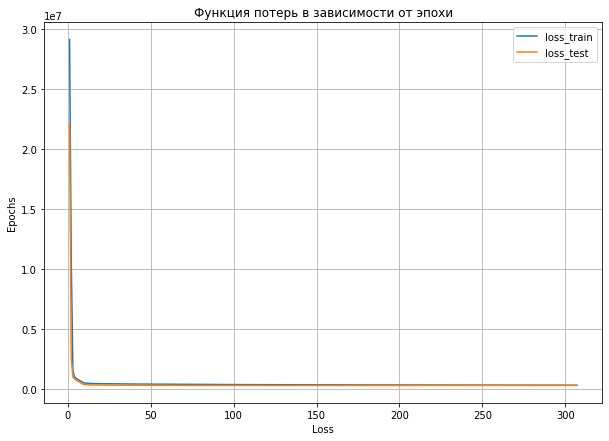

In [99]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot([i for i in range(1, 307 + 1)], loss_history_train, label = 'loss_train')
plt.plot([i for i in range(1, 307 + 1)], loss_history_test, label = 'loss_test')
plt.title('Функция потерь в зависимости от эпохи')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid(True)

In [100]:
for X_test, y_test in dataset_test:
    y_pred = model(X_test.float().to(device))

In [101]:
y_pred.shape, y_test.shape

(torch.Size([10788, 1]), torch.Size([10788, 1]))

In [102]:
r2_score(y_test, y_pred.detach())

0.9799779906155526

In [103]:
y_test

tensor([[ 2307.],
        [ 1031.],
        [11739.],
        ...,
        [ 6809.],
        [ 5234.],
        [ 1132.]], dtype=torch.float64)

In [104]:
y_pred

tensor([[ 2083.8701],
        [  726.4914],
        [11780.4678],
        ...,
        [ 6904.8843],
        [ 5569.3599],
        [ 1125.4762]], grad_fn=<AddmmBackward>)

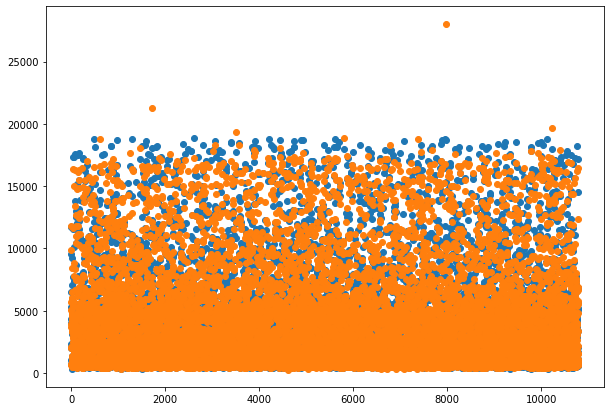

In [105]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter([i for i in range(len(y_test))], y_test)
plt.scatter([i for i in range(len(y_pred))], y_pred.detach())